<a href="https://colab.research.google.com/github/mnassar/oneuppuzzle/blob/main/OneUpPuzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve any OneUp Puzzle

## @author: mohamad nassar

## Nov 2024

#### game website: https://www.oneuppuzzle.com/


<img src="https://drive.google.com/uc?id=1QB30G2AB9wemxYovRTDGA3Nj_lP6B25e" alt="drawing" width="200"/>

In [156]:
!curl -L  https://drive.google.com/uc?id=1QB30G2AB9wemxYovRTDGA3Nj_lP6B25e  --output board216.png
!curl -L  https://drive.google.com/uc?id=1iP2lTATQZqT_M30cfcQd4yVIjfFGhNYm  --output board230.png



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  105k  100  105k    0     0  45489      0  0:00:02  0:00:02 --:--:--   97k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  110k  100  110k    0     0  56561      0  0:00:02  0:00:02 --:--:--  155k


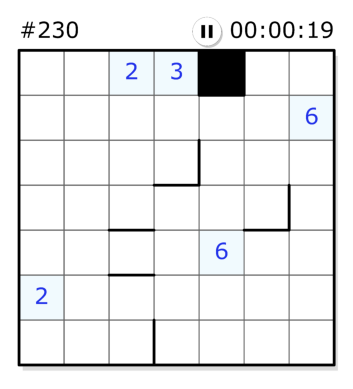

In [157]:
import cv2
from matplotlib import pyplot as plt
# img_color = cv2.imread('board216.png')
img_color = cv2.imread('board230.png')
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [158]:
#game strings
# r for row, w for wall, x for unknown
# gamestr_h = "216xxxrxxwxxxxr4xxxxxrxxxwxx2rxxxxx1rxxxxx6"
# c for col, w for wall, x for unknown
# gamestr_v = "2x4xxxc1xxwxxxc6xxxxxcxxxxxxcxxxxwxxcxxx216"

gamestr_h = "xx23bxxrxxxxxx6rxxxxwxxxrxxxxxxwxrxxxx6xxr2xxxxxxrxxxwxxxx"
gamestr_v = "xxxxx2xcxxxxxxxc2xxxwxwxxc3xxwxxxxcbxxx6xxcxxxxwxxxcx6xxxxx"

In [159]:


# parse the string
board = {}
i,j,segh,segv = 0,0,0,0
for c in gamestr_h:
  if c == 'x':
    board[(i,j,segh,segv)] = -1
    j += 1
  elif c == 'r':
    i += 1
    j = 0
    segh = 0
  elif c == 'w':
    segh += 1
  elif c == 'b':
    segh += 1
    j += 1
  else:
    board[(i,j,segh,segv)] = int(c)
    j += 1
nb_rows = i + 1
# correction for vertical walls
i,j,segh,segv = 0,0,0,0
for c in gamestr_v:
  if c == 'x':
    board[(i,j,segh,segv)] = -1
    i += 1
  elif c == 'c':
    j += 1
    i = 0
    segv = 0
  elif c == 'w':
    segv += 1
  elif c == 'b':
    segv += 1
    i += 1
  else:
    board[(i,j,segh,segv)] = int(c)
    i += 1
nb_cols = j + 1
print (nb_rows, nb_cols)
# merge using max seg
for i in range(nb_rows):
  for j in range(nb_cols):
    groupby = [ k for k in board.keys() if k[0] == i and k[1] == j ]
    if len(groupby) == 0:
      continue
    # print (groupby)
    max_segh = max ( k[2] for k in groupby )
    max_segv = max ( k[3] for k in groupby )
    t = board[groupby[0]]
    for k in groupby:
      del board[k]
    board[(i, j, max_segh, max_segv)] = t


for k in sorted(board.keys()):
  print ( k, board[k] )



7 7
(0, 0, 0, 0) -1
(0, 1, 0, 0) -1
(0, 2, 0, 0) 2
(0, 3, 0, 0) 3
(0, 5, 1, 0) -1
(0, 6, 1, 0) -1
(1, 0, 0, 0) -1
(1, 1, 0, 0) -1
(1, 2, 0, 0) -1
(1, 3, 0, 0) -1
(1, 4, 0, 1) -1
(1, 5, 0, 0) -1
(1, 6, 0, 0) 6
(2, 0, 0, 0) -1
(2, 1, 0, 0) -1
(2, 2, 0, 0) -1
(2, 3, 0, 0) -1
(2, 4, 1, 1) -1
(2, 5, 1, 0) -1
(2, 6, 1, 0) -1
(3, 0, 0, 0) -1
(3, 1, 0, 0) -1
(3, 2, 0, 0) -1
(3, 3, 0, 1) -1
(3, 4, 0, 1) -1
(3, 5, 0, 0) -1
(3, 6, 1, 0) -1
(4, 0, 0, 0) -1
(4, 1, 0, 0) -1
(4, 2, 0, 1) -1
(4, 3, 0, 1) -1
(4, 4, 0, 1) 6
(4, 5, 0, 1) -1
(4, 6, 0, 0) -1
(5, 0, 0, 0) 2
(5, 1, 0, 0) -1
(5, 2, 0, 2) -1
(5, 3, 0, 1) -1
(5, 4, 0, 1) -1
(5, 5, 0, 1) -1
(5, 6, 0, 0) -1
(6, 0, 0, 0) -1
(6, 1, 0, 0) -1
(6, 2, 0, 2) -1
(6, 3, 1, 1) -1
(6, 4, 1, 1) -1
(6, 5, 1, 1) -1
(6, 6, 1, 0) -1


In [160]:
# plot the board
#game strings
# r for row, w for wall, x for unknown
# gamestr_h = "216xxxrxxwxxxxr4xxxxxrxxxwxx2rxxxxx1rxxxxx6"
# # c for col, w for wall, x for unknown
# gamestr_v = "2x4xxxc1xxwxxxc6xxxxxcxxxxxxcxxxxwxxcxxx216"


# game_str = ""
# for c in gamestr_h:
#   if c == 'r':
#     game_str += '\n'
#   elif c == 'w':
#     game_str += '\b|'
#   else:
#     game_str += c + ' '

# for c in gamestr_v:
#   if c == 'c':

# print (game_str)

seg_h = 0
seg_v = 0
for i in range(nb_rows):
  line = ""
  last = 0
  for j in range(nb_cols):
    # check if there is a wall down side
    candidate = [ k for k in board.keys() if k[0] == i and k[1] == j ]
    if len(candidate) == 0:
       print('b', end=' ')
       continue
    else:
       candidate = candidate[0]

    down = [ k for k in board.keys() if k[0] == i + 1 and k[1] == j and k[3] == candidate[3] + 1 ]
    if len(down) > 0:
      if last == 0:
        line = "\n" + " " * (2*j) + "-"
        last = j
      else:
        line +=  " " * (2*(j-last) - 1) + "-"
    if candidate[2] != seg_h:
      seg_h += 1
      print ("\b|" , end = '')
    if board[candidate] == -1:
      print ('x', end=" ")
    else:
      print (board[candidate], end=" ")

  print(line)
  seg_h = 0
  last = 0



x x 2 3 b |x x 
x x x x x x 6 
x x x x |x x x 
      -
x x x x x x |x 
    -     -
x x x x 6 x x 
    -
2 x x x x x x 
x x x |x x x x 


In [161]:
# data representation
# encode the board in 4 dimensions: r,c,segh,segv
# I am going to represent empty square by -1

# bb = {} # for board 216

# bb[(0,0,0,0)] = 2
# bb[(0,1,0,0)] = 1
# bb[(0,2,0,0)] = 6
# bb[(0,3,0,0)] = -1
# bb[(0,4,0,0)] = -1
# bb[(0,5,0,0)] = -1

# bb[(1,0,0,0)] = -1
# bb[(1,1,0,0)] = -1
# # implicit encoding of a wall
# bb[(1,2,1,0)] = -1
# bb[(1,3,1,0)] = -1
# bb[(1,4,1,0)] = -1
# bb[(1,5,1,0)] = -1

# bb[(2,0,0,0)] = 4
# bb[(2,1,0,0)] = -1
# bb[(2,2,0,0)] = -1
# bb[(2,3,0,0)] = -1
# bb[(2,4,0,0)] = -1
# bb[(2,5,0,0)] = -1

# bb[(3,0,0,0)] = -1
# bb[(3,1,0,1)] = -1
# bb[(3,2,0,0)] = -1
# bb[(3,3,1,0)] = -1
# bb[(3,4,1,0)] = -1
# bb[(3,5,1,0)] = 2

# bb[(4,0,0,0)] = -1
# bb[(4,1,0,1)] = -1
# bb[(4,2,0,0)] = -1
# bb[(4,3,0,0)] = -1
# bb[(4,4,0,1)] = -1
# bb[(4,5,0,0)] = 1

# bb[(5,0,0,0)] = -1
# bb[(5,1,0,1)] = -1
# bb[(5,2,0,0)] = -1
# bb[(5,3,0,0)] = -1
# bb[(5,4,0,1)] = -1
# bb[(5,5,0,0)] = 6
# # verify our board extraction is correct
# bb == board

In [162]:
# draw the board


In [163]:
# domain extraction

# to figure out the domain of a square,
## look at (row, segh) / how many squares have same row and same segh
## look at (col, segv) / how many squares have same col and same segv

domain = {}

# segment horizontally
d_row_segh = {} # key is row, segh and the value is the range

for r in range(nb_rows):
  # give me all the entries in board where row = r
  # count all the entries with segh = 0
  # increase segh
  counter = 0
  segh = 0
  for key in board.keys():
    if key[0] == r:
      if key[2] != segh:
        d_row_segh[(r, segh)] = counter
        segh += 1
        counter = 0
      if key[0] == r and key[2] == segh:
        counter += 1
  d_row_segh[(r, segh)] = counter


print(d_row_segh)


{(0, 0): 4, (0, 1): 2, (1, 0): 7, (2, 0): 4, (2, 1): 3, (3, 0): 6, (3, 1): 1, (4, 0): 7, (5, 0): 7, (6, 0): 3, (6, 1): 4}


In [164]:
# need to intersect with d_row_segv
d_col_segv = {}

for c in range(nb_cols):
  # give me all the entries in board where col = c
  # count all the entries with segv = 0
  # increase segv
  counter = 0
  segv = 0
  for key in board.keys():
    if key[1] == c:
      if key[3] != segv:
        d_col_segv[(c, segv)] = counter
        segv += 1
        counter = 0
      if key[1] == c and key[3] == segv:
        counter += 1
  d_col_segv[(c, segv)] = counter

print(d_col_segv)



{(0, 0): 7, (1, 0): 7, (2, 0): 4, (2, 1): 1, (2, 2): 2, (3, 0): 3, (3, 1): 4, (4, 0): 0, (4, 1): 6, (5, 0): 4, (5, 1): 3, (6, 0): 7}


In [165]:
# compute domains
for k in board.keys():
  # print (  d_row_segh[(k[0], k[2])] , d_col_segv[(k[1], k[3])] )
  if board[k] != -1:
    domain[k] = set([board[k]])
  else:

    domain[k] = set(range( 1, min ( d_row_segh[(k[0], k[2])] , d_col_segv[(k[1], k[3])] ) + 1 ) )

# for k in sorted ( domain.keys() ) :
#   print(k, domain[k])


In [166]:
# forward propagation
# remove every singleton from the entries sharing same r,segh or c,segv

def forward_propagate(domain):
  op = 0
  for k in domain.keys():
    if len(domain[k]) == 1:
      nei = [ k1 for k1 in domain.keys() if  ( (k != k1) and ((k[0] == k1[0] and k[2] == k1[2]) or (k[1] == k1[1] and k[3] == k1[3])) ) ]

      for l in nei:

        if (domain[k].issubset(domain[l])):

          domain[l] -= domain[k]
          # print (l, k, domain[l])
          op += 1
  return op

op = 1
cnt = 0
while op != 0:
  op = forward_propagate(domain)
cnt += 1
# print (cnt)
# for k in sorted ( domain.keys() ) :
#   print(k, domain[k])


In [167]:
# backtracking
# select an entry where domain has size > 1
# make a choice
# forward propagate
# if a domain becomes empty, backtrack
# if all domains are singleton, declare game over

import copy
import random
def backtrack(domain_copy):
  # look for an undecided variable
  k =  random.choice ( [ k1 for k1 in domain_copy.keys() if len(domain_copy[k1]) > 1 ] )

  for v in domain_copy[k]:
    # make a choice
    domain_copy1 = copy.deepcopy(domain_copy)
    domain_copy1[k] = set([v])
    forward_propagate(domain_copy1)

    # what is the outcome of this choice
    # 1: failure -- check if domain_copy has an empty domain
    empty = False
    for k1 in domain_copy1.keys():
      if len(domain_copy1[k1]) == 0:
        empty = True
        break
    if empty:
      continue # move to the next choice

    # 2: success -- check if all domains are singleton
    else:
      for k1 in domain_copy1.keys():
        if len(domain_copy1[k1]) > 1:
          break
      else:
        return (True, domain_copy1)
    # 3: not yet -- go to a new decision variable
    (status, sol) = backtrack(domain_copy1)
    # if going forward not working
    if status:
      return (status, sol)
    else:
      continue
      # return backtrack(domain_copy) # try another variable to start with
  return False, {}

domain_copy = copy.deepcopy(domain)
status, sol = backtrack(domain_copy)


for k in sorted ( sol.keys() ) :
  # print(k, sol[k])
  if board[k] == -1:
    sol[(k[0], k[1])] = sol[k]


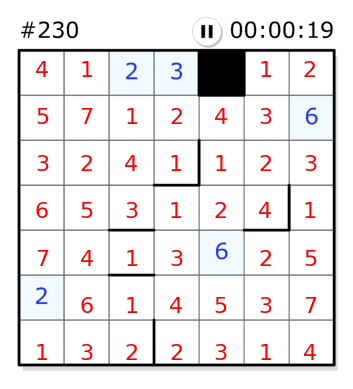

In [168]:
# plot the solution

import cv2
from matplotlib import pyplot as plt

# img_color = cv2.imread('board216.png')
img_color = cv2.imread('board230.png')
plt.imshow(img_color)
plt.axis("off")

for x in range(nb_rows):
  for y in range(nb_cols):
    if (x,y) in sol.keys():
      # for #216
      # plt.text(100 + 210 * y , 270 + 210 * x, list(sol[(x,y)])[0], color="red", fontsize=16)
      # for #230
      plt.text(100 + 180 * y , 270 + 190 * x, list(sol[(x,y)])[0], color="red", fontsize=16)
      # we need to normalize the image dimensions

plt.show()